In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import datetime

In [3]:
df_overview = pd.read_csv('Overview.csv')

In [4]:
df_overview['DeviceTimeStamp'] = pd.to_datetime(df_overview['DeviceTimeStamp'],format = '%Y-%m-%d %H:%M:%S')
df_overview.head()

DeviceTimeStamp  OTI  WTI  ATI   OLI  OTI_A  OTI_T  MOG_A
0 2019-06-25 13:06:00  0.0  0.0  0.0  37.0    0.0    0.0    0.0
1 2019-06-25 13:09:00  0.0  0.0  0.0  37.0    0.0    0.0    0.0
2 2019-06-27 10:49:00  0.0  0.0  0.0  38.0    0.0    0.0    0.0
3 2019-06-27 10:51:00  0.0  0.0  0.0  38.0    0.0    0.0    0.0
4 2019-06-27 10:52:00  0.0  0.0  0.0  39.0    0.0    0.0    0.0

In [5]:
df_overview.shape

(20316, 8)

In [6]:
df_currvolt = pd.read_csv('CurrentVoltage.csv')
df_currvolt.head()

DeviceTimeStamp    VL1    VL2    VL3  IL1  IL2  IL3  VL12  VL23  VL31  \
0  2019-06-25T13:06    0.0    0.0    0.0  0.0  0.0  0.0   0.0   0.0   0.0   
1  2019-06-27T10:49  238.7  238.7  238.8  0.0  0.0  0.0   0.0   0.0   0.0   
2  2019-06-27T10:51  238.4  238.5  238.5  0.0  0.0  0.0   0.0   0.0   0.0   
3  2019-06-27T10:52  239.9  240.0  240.0  0.0  0.0  0.0   0.0   0.0   0.0   
4  2019-06-27T10:52  239.9  240.0  240.0  0.0  0.0  0.0   0.0   0.0   0.0   

   INUT  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0

In [7]:
df_currvolt['DeviceTimeStamp'] = pd.to_datetime(df_currvolt['DeviceTimeStamp'],format = '%Y-%m-%d %H:%M:%S')
df_currvolt.head()

DeviceTimeStamp    VL1    VL2    VL3  IL1  IL2  IL3  VL12  VL23  VL31  \
0 2019-06-25 13:06:00    0.0    0.0    0.0  0.0  0.0  0.0   0.0   0.0   0.0   
1 2019-06-27 10:49:00  238.7  238.7  238.8  0.0  0.0  0.0   0.0   0.0   0.0   
2 2019-06-27 10:51:00  238.4  238.5  238.5  0.0  0.0  0.0   0.0   0.0   0.0   
3 2019-06-27 10:52:00  239.9  240.0  240.0  0.0  0.0  0.0   0.0   0.0   0.0   
4 2019-06-27 10:52:00  239.9  240.0  240.0  0.0  0.0  0.0   0.0   0.0   0.0   

   INUT  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0

In [8]:
df_currvolt.shape

(19352, 11)

In [9]:
transformer = pd.merge(df_overview, df_currvolt, on='DeviceTimeStamp')
transformer.head()

DeviceTimeStamp  OTI  WTI  ATI   OLI  OTI_A  OTI_T  MOG_A    VL1    VL2  \
0 2019-06-25 13:06:00  0.0  0.0  0.0  37.0    0.0    0.0    0.0    0.0    0.0   
1 2019-06-27 10:49:00  0.0  0.0  0.0  38.0    0.0    0.0    0.0  238.7  238.7   
2 2019-06-27 10:51:00  0.0  0.0  0.0  38.0    0.0    0.0    0.0  238.4  238.5   
3 2019-06-27 10:52:00  0.0  0.0  0.0  39.0    0.0    0.0    0.0  239.9  240.0   
4 2019-06-27 10:52:00  0.0  0.0  0.0  39.0    0.0    0.0    0.0  239.9  240.0   

     VL3  IL1  IL2  IL3  VL12  VL23  VL31  INUT  
0    0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0  
1  238.8  0.0  0.0  0.0   0.0   0.0   0.0   0.0  
2  238.5  0.0  0.0  0.0   0.0   0.0   0.0   0.0  
3  240.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0  
4  240.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0

In [10]:
transformer.shape

(20465, 18)

In [11]:
transformer.describe()

OTI           WTI           ATI           OLI         OTI_A  \
count  20465.000000  20465.000000  20465.000000  20465.000000  20465.000000   
mean      30.084974      0.259614     27.770291     69.685561      0.003616   
std       10.710617      0.438434      5.742023     27.778116      0.060025   
min        0.000000      0.000000      0.000000     36.000000      0.000000   
25%       26.000000      0.000000     24.000000     40.000000      0.000000   
50%       30.000000      0.000000     28.000000     64.000000      0.000000   
75%       34.000000      1.000000     32.000000    100.000000      0.000000   
max      248.000000      1.000000     44.000000    100.000000      1.000000   

              OTI_T         MOG_A           VL1           VL2           VL3  \
count  20465.000000  20465.000000  20465.000000  20465.000000  20465.000000   
mean       0.001613      0.100024    241.054298    240.518471    239.948307   
std        0.040125      0.300040      9.243036      9.645709      8.551468   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000    235.800000    235.500000    235.500000   
50%        0.000000      0.000000    242.400000    241.900000    241.000000   
75%        0.000000      0.000000    247.300000    246.500000    245.100000   
max        1.000000      1.000000    261.200000    261.300000    261.300000   

                IL1           IL2           IL3          VL12          VL23  \
count  20465.000000  20465.000000  20465.000000  20465.000000  20465.000000   
mean      70.640137     56.540704     79.806504    364.269900    363.370222   
std       42.819608     41.185621     45.669723    139.137449    138.572355   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       43.700000     28.800000     53.200000    397.700000    398.500000   
50%       67.500000     48.700000     77.700000    416.300000    415.400000   
75%       98.300000     80.200000    111.800000    427.200000    425.000000   
max      224.100000    253.600000    247.300000    446.500000    444.800000   

               VL31          INUT  
count  20465.000000  20465.000000  
mean     364.753975     25.231747  
std      139.285162     15.674539  
min        0.000000      0.000000  
25%      399.300000     15.400000  
50%      416.600000     24.800000  
75%      427.300000     35.200000  
max      447.300000    145.800000

In [12]:
transformer['MOG_A'].value_counts()

0.0    18418
1.0     2047
Name: MOG_A, dtype: int64

In [13]:
df_overview = transformer.iloc[:, 1:8]
df_overview.head()

OTI  WTI  ATI   OLI  OTI_A  OTI_T  MOG_A
0  0.0  0.0  0.0  37.0    0.0    0.0    0.0
1  0.0  0.0  0.0  38.0    0.0    0.0    0.0
2  0.0  0.0  0.0  38.0    0.0    0.0    0.0
3  0.0  0.0  0.0  39.0    0.0    0.0    0.0
4  0.0  0.0  0.0  39.0    0.0    0.0    0.0

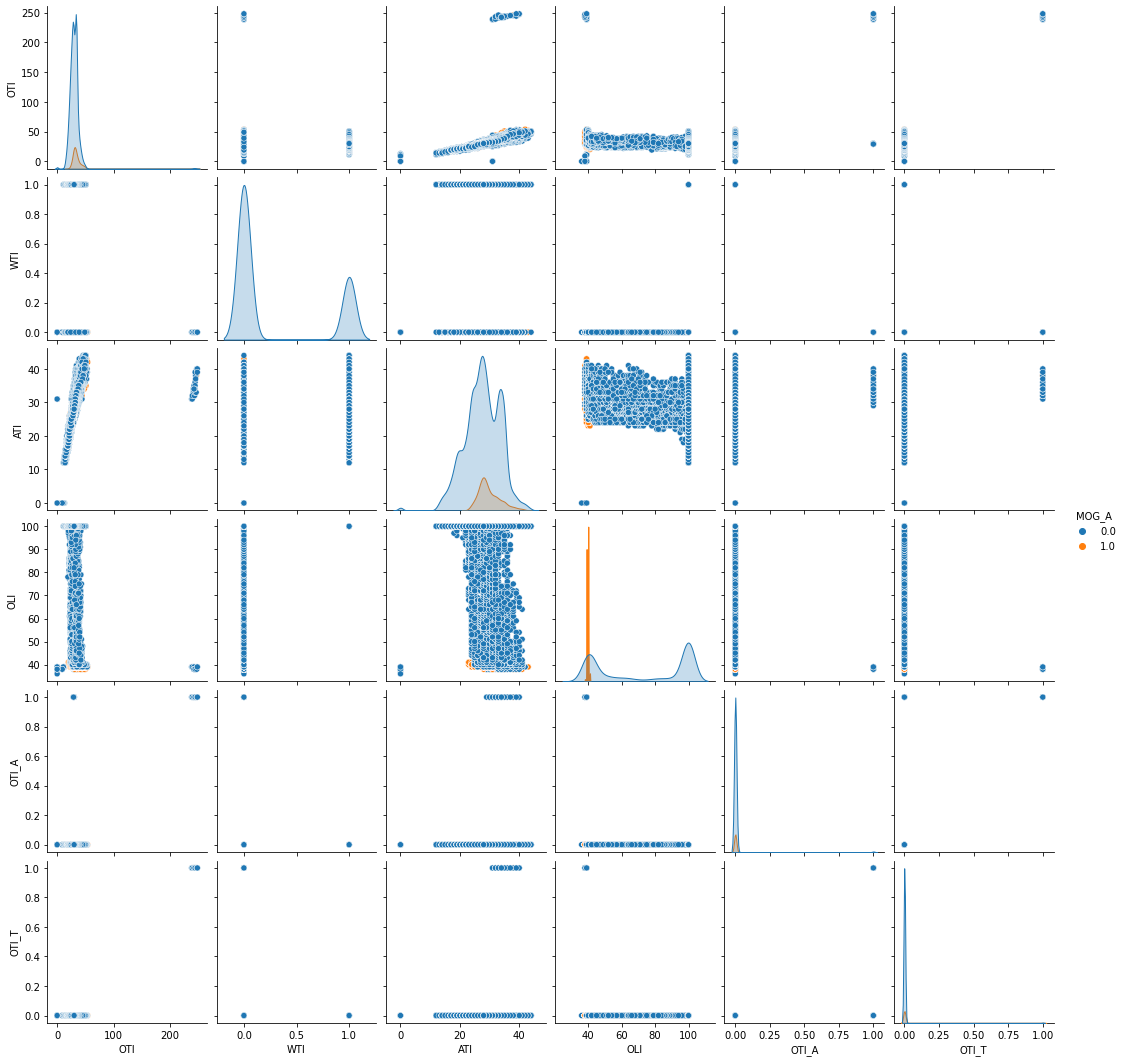

In [15]:
sns.pairplot(data=df_overview, hue='MOG_A')

In [16]:
df_currvolt = transformer.iloc[:, 7::]
df_currvolt.head()

MOG_A    VL1    VL2    VL3  IL1  IL2  IL3  VL12  VL23  VL31  INUT
0    0.0    0.0    0.0    0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0
1    0.0  238.7  238.7  238.8  0.0  0.0  0.0   0.0   0.0   0.0   0.0
2    0.0  238.4  238.5  238.5  0.0  0.0  0.0   0.0   0.0   0.0   0.0
3    0.0  239.9  240.0  240.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0
4    0.0  239.9  240.0  240.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0

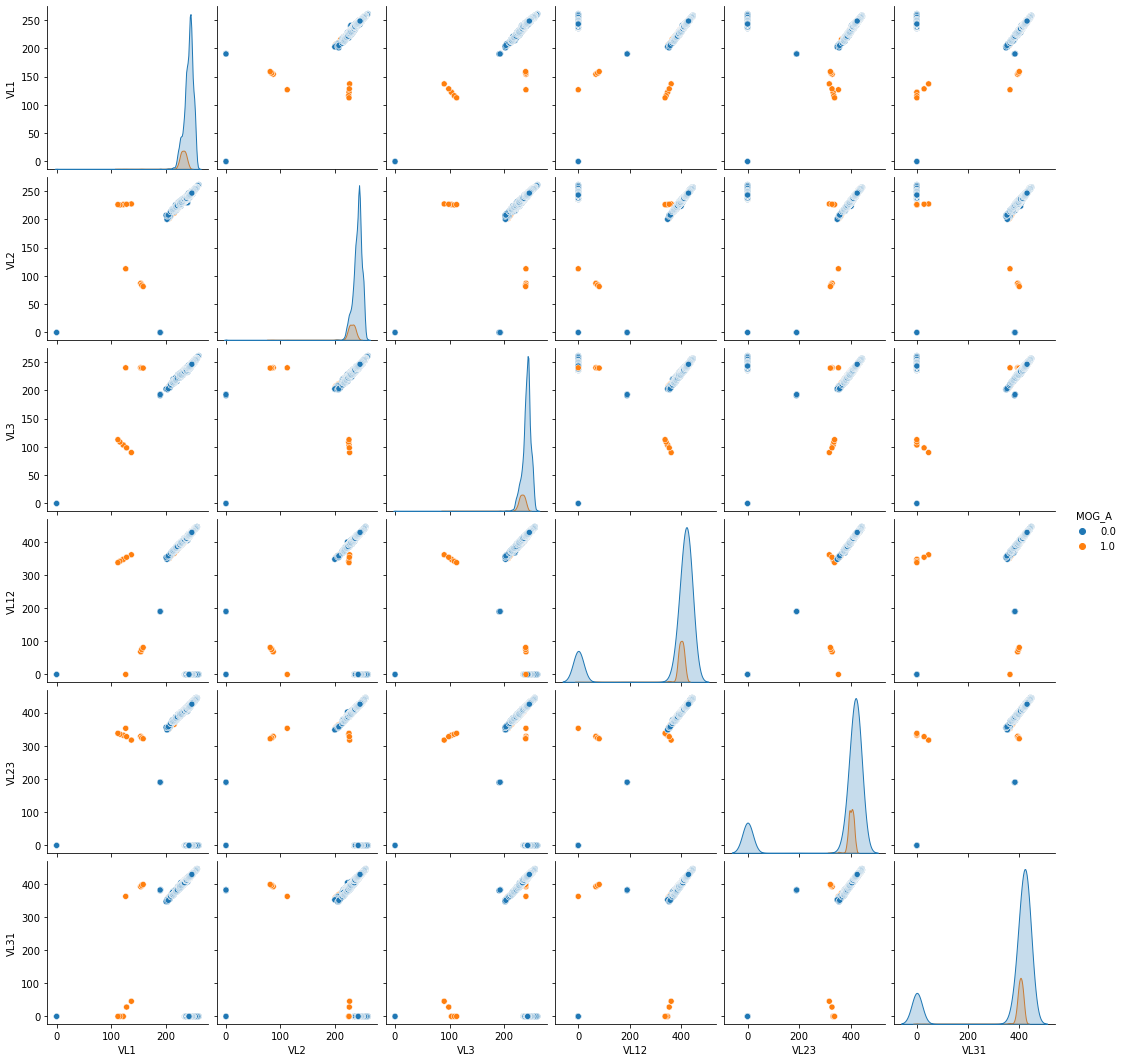

In [17]:
df_volt = df_currvolt[['VL1', 'VL2', 'VL3', 'VL12', 'VL23', 'VL31', 'MOG_A']]
sns.pairplot(data=df_volt, hue='MOG_A')

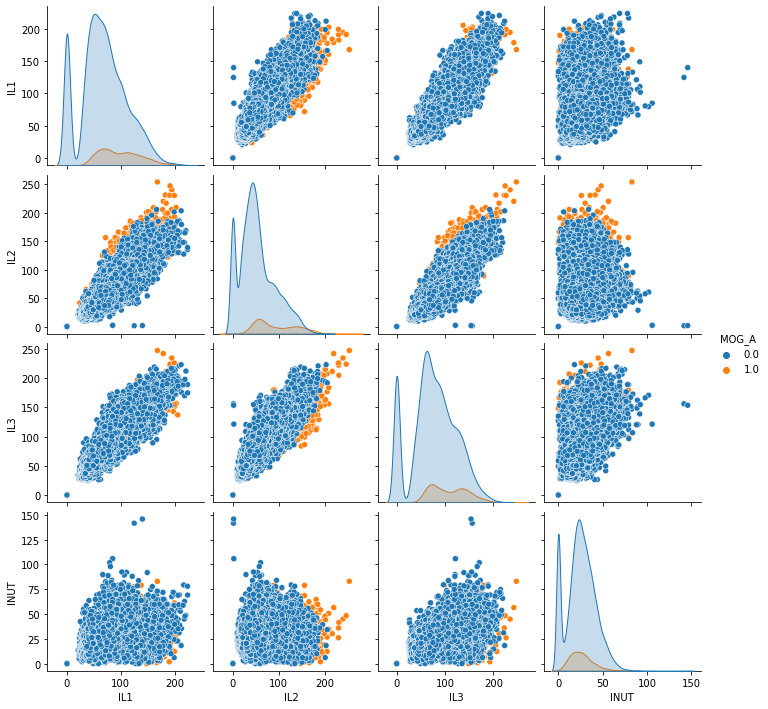

In [18]:
df_curr = df_currvolt[['IL1', 'IL2', 'IL3', 'INUT', 'MOG_A']]
sns.pairplot(data=df_curr, hue='MOG_A')

<AxesSubplot:xlabel='DeviceTimeStamp', ylabel='MOG_A'>

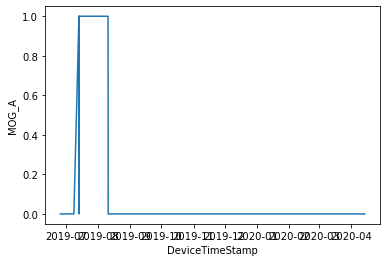

In [19]:
sns.lineplot(data=transformer, x='DeviceTimeStamp', y='MOG_A')

<AxesSubplot:xlabel='MOG_A', ylabel='Count'>

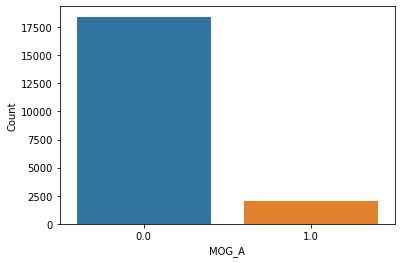

In [20]:
df_target_count = transformer['MOG_A'].value_counts().reset_index().rename(columns={'index': 'MOG_A', 'MOG_A': 'Count'})
sns.barplot(data=df_target_count, x='MOG_A', y='Count')

`We can notice that our data set is highly imbalance. Only ~10% out of the 20,000 data points were predicted as indicator of fault. To compensate for this, we will use  Synthetic Minority Oversampling Technique (SMOTE) to set class balance in our data set. This technique generates synthetic data for the minority class. SMOTE works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.`

In [21]:
df_trans = transformer.iloc[:, 1::]
df_trans.head()

OTI  WTI  ATI   OLI  OTI_A  OTI_T  MOG_A    VL1    VL2    VL3  IL1  IL2  \
0  0.0  0.0  0.0  37.0    0.0    0.0    0.0    0.0    0.0    0.0  0.0  0.0   
1  0.0  0.0  0.0  38.0    0.0    0.0    0.0  238.7  238.7  238.8  0.0  0.0   
2  0.0  0.0  0.0  38.0    0.0    0.0    0.0  238.4  238.5  238.5  0.0  0.0   
3  0.0  0.0  0.0  39.0    0.0    0.0    0.0  239.9  240.0  240.0  0.0  0.0   
4  0.0  0.0  0.0  39.0    0.0    0.0    0.0  239.9  240.0  240.0  0.0  0.0   

   IL3  VL12  VL23  VL31  INUT  
0  0.0   0.0   0.0   0.0   0.0  
1  0.0   0.0   0.0   0.0   0.0  
2  0.0   0.0   0.0   0.0   0.0  
3  0.0   0.0   0.0   0.0   0.0  
4  0.0   0.0   0.0   0.0   0.0

In [22]:
from imblearn.over_sampling import SMOTE
from collections import Counter

x = df_trans.drop(['MOG_A'],axis=1)
y = df_trans.iloc[:, 1::]['MOG_A']

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0.0: 18418, 1.0: 2047})
Resample dataset shape Counter({0.0: 18418, 1.0: 18418})


In [23]:
df_trans_res = x_smote.copy()
df_trans_res['MOG_A'] = y_smote
df_trans_res.head()

OTI  WTI  ATI   OLI  OTI_A  OTI_T    VL1    VL2    VL3  IL1  IL2  IL3  \
0  0.0  0.0  0.0  37.0    0.0    0.0    0.0    0.0    0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  38.0    0.0    0.0  238.7  238.7  238.8  0.0  0.0  0.0   
2  0.0  0.0  0.0  38.0    0.0    0.0  238.4  238.5  238.5  0.0  0.0  0.0   
3  0.0  0.0  0.0  39.0    0.0    0.0  239.9  240.0  240.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  39.0    0.0    0.0  239.9  240.0  240.0  0.0  0.0  0.0   

   VL12  VL23  VL31  INUT  MOG_A  
0   0.0   0.0   0.0   0.0    0.0  
1   0.0   0.0   0.0   0.0    0.0  
2   0.0   0.0   0.0   0.0    0.0  
3   0.0   0.0   0.0   0.0    0.0  
4   0.0   0.0   0.0   0.0    0.0

<AxesSubplot:xlabel='index', ylabel='MOG_A'>

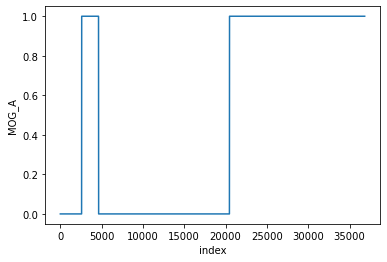

In [27]:
sns.lineplot(data=df_trans_res.reset_index(), x='index', y='MOG_A')

<AxesSubplot:xlabel='IL1', ylabel='MOG_A'>

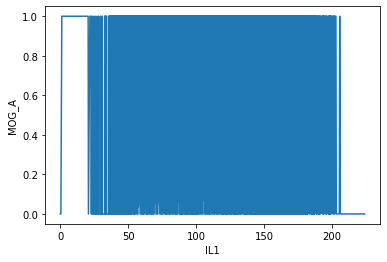

In [28]:
sns.lineplot(data=df_trans_res, x='IL1', y='MOG_A')

<AxesSubplot:xlabel='VL1', ylabel='MOG_A'>

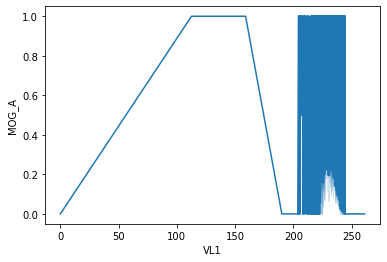

In [29]:
sns.lineplot(data=df_trans_res, x='VL1', y='MOG_A')

<AxesSubplot:xlabel='VL2', ylabel='MOG_A'>

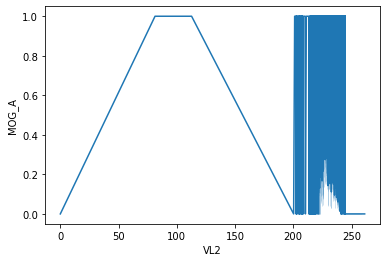

In [30]:
sns.lineplot(data=df_trans_res, x='VL2', y='MOG_A')

<AxesSubplot:xlabel='IL2', ylabel='MOG_A'>

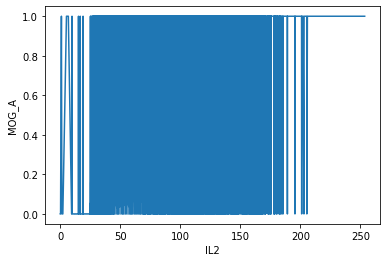

In [31]:
sns.lineplot(data=df_trans_res, x='IL2', y='MOG_A')

<AxesSubplot:xlabel='INUT', ylabel='MOG_A'>

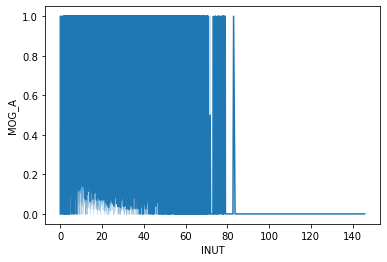

In [32]:
sns.lineplot(data=df_trans_res, x='INUT', y='MOG_A')

In [90]:
df_trans_res['WTI'].value_counts()

0.0    3529
1.0     565
Name: WTI, dtype: int64

In [91]:
df_trans_res['OTI_A'].value_counts()

0.0    4087
1.0       7
Name: OTI_A, dtype: int64

In [92]:
df_trans_res['OTI_T'].value_counts()

0.0    4089
1.0       5
Name: OTI_T, dtype: int64

In [34]:
df_trans_res.describe()

OTI           WTI           ATI           OLI         OTI_A  \
count  36836.000000  36836.000000  36836.000000  36836.000000  36836.000000   
mean      31.687108      0.144234     28.694151     56.301159      0.002299   
std        9.630683      0.351332      4.998038     25.548869      0.047493   
min        0.000000      0.000000      0.000000     36.000000      0.000000   
25%       28.000000      0.000000     26.000000     39.070325      0.000000   
50%       31.000000      0.000000     28.443022     40.000000      0.000000   
75%       34.222211      0.000000     32.000000     84.000000      0.000000   
max      248.000000      1.000000     44.000000    100.000000      1.000000   

              OTI_T           VL1           VL2           VL3           IL1  \
count  36836.000000  36836.000000  36836.000000  36836.000000  36836.000000   
mean       0.001186    236.861965    236.203681    236.473848     83.391473   
std        0.033858     10.345492     10.894664      9.491920     42.636958   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000    230.542501    229.600000    230.900000     54.900000   
50%        0.000000    236.700000    236.285729    236.780168     78.752525   
75%        0.000000    243.600000    243.300000    242.200000    113.000000   
max        1.000000    261.200000    261.300000    261.300000    224.100000   

                IL2           IL3          VL12          VL23          VL31  \
count  36836.000000  36836.000000  36836.000000  36836.000000  36836.000000   
mean      73.814859     92.616186    380.005778    380.083114    381.548581   
std       46.704702     44.352714    106.181389    105.233238    106.584296   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       41.900000     64.100000    394.484346    395.400000    397.900178   
50%       62.200000     89.331501    406.400000    406.700000    408.287436   
75%      106.700000    127.026118    420.397432    418.700000    420.396531   
max      253.600000    247.300000    446.500000    444.800000    447.300000   

               INUT         MOG_A  
count  36836.000000  36836.000000  
mean      25.416684      0.500000  
std       14.207836      0.500007  
min        0.000000      0.000000  
25%       16.000000      0.000000  
50%       24.500000      0.500000  
75%       34.059598      1.000000  
max      145.800000      1.000000

In [35]:
df_trans_res.var()

OTI         92.750063
WTI          0.123434
ATI         24.980381
OLI        652.744691
OTI_A        0.002256
OTI_T        0.001146
VL1        107.029202
VL2        118.693696
VL3         90.096546
IL1       1817.910149
IL2       2181.329177
IL3       1967.163203
VL12     11274.487366
VL23     11074.034423
VL31     11360.212153
INUT       201.862610
MOG_A        0.250007
dtype: float64

In [36]:
X = df_trans_res.drop(['OLI', 'MOG_A'],axis=1)
y = df_trans_res['MOG_A']

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

Number_trials=20

def train_RF(X, y, reg):
    max_features_tuning=[0.1, .2, .3, .4, .5, .7, .8]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=seed)
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        for max_features_run in max_features_tuning:
            svc = RandomForestClassifier(n_estimators=100, max_features=max_features_run).fit(X_train, y_train)
            training_accuracy.append(svc.score(X_train, y_train))
            test_accuracy.append(svc.score(X_test, y_test))
           # if alpha_run == 0.01:
            coefs = svc.feature_importances_
            weighted_coefs.append(coefs)
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)
    

    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(3,7))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Random Forest', np.amax(score), \
            'Max_features = {0}'.format(max_features_tuning[np.argmax(score)]), top_predictor,run_time]

def train_GBM(X, y, reg):
    max_features_tuning=[0.1, .2, .3, .4, .5, .7, .8]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=seed)
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        for max_features_run in max_features_tuning:
            gbm = GradientBoostingClassifier(n_estimators=100, max_features=max_features_run).fit(X_train, y_train)
            training_accuracy.append(gbm.score(X_train, y_train))
            test_accuracy.append(gbm.score(X_test, y_test))
            coefs = gbm.feature_importances_
            weighted_coefs.append(coefs)
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)
    

    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(3,7))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Gradient Boosting Method', np.amax(score), \
            'Max_features = {0}'.format(max_features_tuning[np.argmax(score)]), top_predictor,run_time]

def train_ETC(X, y, reg):
    max_features_tuning=[0.1, .2, .3, .4, .5, .7, .8]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=seed)
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        for max_features_run in max_features_tuning:
            etc = ExtraTreesClassifier(n_estimators=100, max_features=max_features_run).fit(X_train, y_train)
            training_accuracy.append(etc.score(X_train, y_train))
            test_accuracy.append(etc.score(X_test, y_test))
           # if alpha_run == 0.01:
            coefs = etc.feature_importances_
            weighted_coefs.append(coefs)
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)
    

    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(3,7))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Extra Trees Classifier', np.amax(score), \
            'Max_features = {0}'.format(max_features_tuning[np.argmax(score)]), top_predictor,run_time]

def train_ADA(X, y, reg):
    max_features_tuning=[0.1, .2, .3, .4, .5, .7, .8]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=seed)
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        for max_features_run in max_features_tuning:
            ada = AdaBoostClassifier(n_estimators=100).fit(X_train, y_train)
            training_accuracy.append(ada.score(X_train, y_train))
            test_accuracy.append(ada.score(X_test, y_test))
           # if alpha_run == 0.01:
            coefs = ada.feature_importances_
            weighted_coefs.append(coefs)
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)
    

    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(3,7))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Ada Boost Classifier', np.amax(score), \
            'Max_features = {0}'.format(max_features_tuning[np.argmax(score)]), top_predictor,run_time]

def train_XGB(X, y, reg):
    max_features_tuning=[0.1, .2, .3, .4, .5, .7, .8]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=seed)
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        for max_features_run in max_features_tuning:
            xgb = Xgb.XGBClassifier().fit(X_train, y_train)
            training_accuracy.append(xgb.score(X_train, y_train))
            test_accuracy.append(xgb.score(X_test, y_test))
           # if alpha_run == 0.01:
            coefs = xgb.feature_importances_
            weighted_coefs.append(coefs)
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)
    

    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(3,7))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['XG Boost Classifier', np.amax(score), \
            'Max_features = {0}'.format(max_features_tuning[np.argmax(score)]), top_predictor,run_time]


['Random Forest', 0.9803881650380024, 'Max_features = 0.4', 'VL2', 1772.5575284957886]
1772.5575284957886 seconds


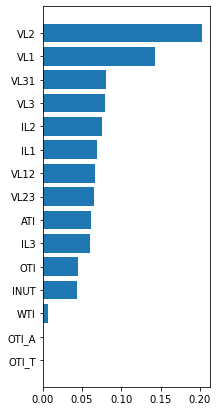

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

import time

start_time = time.time()
f = train_RF(X,y,reg='none')
print(f)
print("%s seconds" % f[4])


['Gradient Boosting Method', 0.9244910423452769, 'Max_features = 0.8', 'VL2', 569.8590922355652]
569.8590922355652 seconds


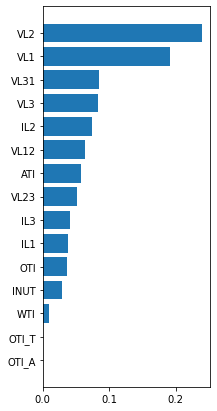

In [41]:
start_time = time.time()
g = train_GBM(X,y,reg='none')
print(g)
print("%s seconds" % g[4])


['Extra Trees Classifier', 0.9839169381107492, 'Max_features = 0.8', 'WTI', 400.3011920452118]
400.3011920452118 seconds


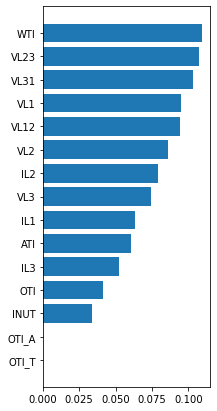

In [42]:
start_time = time.time()
h = train_ETC(X,y,reg='none')
print(h)
print("%s seconds" % h[4])

['Ada Boost Classifier', 0.9017372421281216, 'Max_features = 0.1', 'ATI', 629.6578691005707]
629.6578691005707 seconds


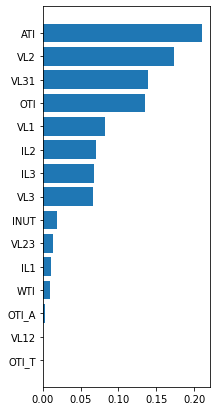

In [43]:
start_time = time.time()
i = train_ADA(X,y,reg='none')
print(i)
print("%s seconds" % i[4])

In [62]:
cols = ['Machine Learning Method', 'Test Accuracy', 'Best Parameter', 'Top Predictor Variable', 'Run Time']
df2 = pd.DataFrame(columns=cols)

df2.loc[0] = f
df2.loc[1] = g
df2.loc[2] = h
df2.loc[3] = i

df2

Machine Learning Method  Test Accuracy      Best Parameter  \
0             Random Forest       0.980388  Max_features = 0.4   
1  Gradient Boosting Method       0.924491  Max_features = 0.8   
2    Extra Trees Classifier       0.983917  Max_features = 0.8   
3      Ada Boost Classifier       0.901737  Max_features = 0.1   

  Top Predictor Variable     Run Time  
0                    VL2  1772.557528  
1                    VL2   569.859092  
2                    WTI   400.301192  
3                    ATI   629.657869

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training Accuracy    : 100.0 %
Model Accuracy Score : 98.07 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      3623
         1.0       0.97      1.00      0.98      3745

    accuracy                           0.98      7368
   macro avg       0.98      0.98      0.98      7368
weighted avg       0.98      0.98      0.98      7368

--------------------------------------------------------


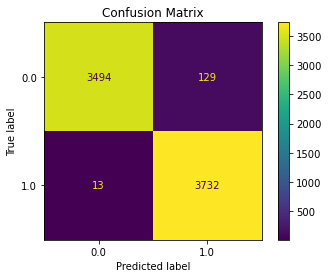

In [59]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")
ConfusionMatrixDisplay.from_estimator(random_forest, X_test, y_test);
plt.title('Confusion Matrix');

Training Accuracy    : 93.09 %
Model Accuracy Score : 92.58 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.98      0.87      0.92      3623
         1.0       0.88      0.98      0.93      3745

    accuracy                           0.93      7368
   macro avg       0.93      0.92      0.93      7368
weighted avg       0.93      0.93      0.93      7368

--------------------------------------------------------


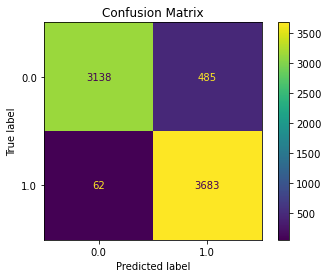

In [57]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

gbm_train = round(gbm.score(X_train, y_train) * 100, 2)
gbm_accuracy = round(accuracy_score(y_pred_gbm, y_test) * 100, 2)

print("Training Accuracy    :",gbm_train ,"%")
print("Model Accuracy Score :",gbm_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_gbm))
print("\033[1m--------------------------------------------------------\033[0m")
ConfusionMatrixDisplay.from_estimator(gbm, X_test, y_test);
plt.title('Confusion Matrix');

Training Accuracy    : 100.0 %
Model Accuracy Score : 98.05 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      3623
         1.0       0.96      1.00      0.98      3745

    accuracy                           0.98      7368
   macro avg       0.98      0.98      0.98      7368
weighted avg       0.98      0.98      0.98      7368

--------------------------------------------------------


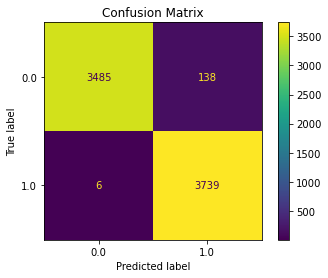

In [60]:
et = ExtraTreesClassifier()
et.fit(X_train,y_train)
y_pred_et = et.predict(X_test)

et_train = round(et.score(X_train, y_train) * 100, 2)
et_accuracy = round(accuracy_score(y_pred_et, y_test) * 100, 2)

print("Training Accuracy    :",et_train ,"%")
print("Model Accuracy Score :",et_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_et))
print("\033[1m--------------------------------------------------------\033[0m")
ConfusionMatrixDisplay.from_estimator(et, X_test, y_test);
plt.title('Confusion Matrix');

Training Accuracy    : 88.93 %
Model Accuracy Score : 87.95 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.94      0.81      0.87      3623
         1.0       0.84      0.95      0.89      3745

    accuracy                           0.88      7368
   macro avg       0.89      0.88      0.88      7368
weighted avg       0.89      0.88      0.88      7368

--------------------------------------------------------


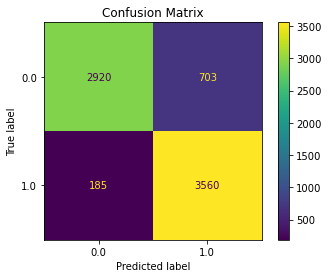

In [61]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

ada_train = round(ada.score(X_train, y_train) * 100, 2)
ada_accuracy = round(accuracy_score(y_pred_ada, y_test) * 100, 2)

print("Training Accuracy    :",ada_train ,"%")
print("Model Accuracy Score :",ada_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_ada))
print("\033[1m--------------------------------------------------------\033[0m")
ConfusionMatrixDisplay.from_estimator(ada, X_test, y_test);
plt.title('Confusion Matrix');

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
from sklearn import model_selection
from sklearn.metrics import mean_squared_error

def run_exps(X_train, X_test, y_train, y_test):    
    '''
    Lightweight script to test many models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    dfs = []
    
    
    models = [
          ('RF', RandomForestClassifier()),
          ('GBM', GradientBoostingClassifier()),
          ('ET', ExtraTreesClassifier()), 
          ('ADA', AdaBoostClassifier())
        ]
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_names = ['Fault', 'No Fault']
    
    classification_report_df = []
    classification_report_list = []
    
    y_pred_df = []
    y_pred_list = []
    accuracy = []
    error = []
    
    for name, model in models:
        #final = []
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        
        
        y_pred = clf.predict(X_test)
        y_pred_list.append(y_pred)
        this_y_pred_df = pd.DataFrame(y_pred)
        this_y_pred_df["model"] = name
        y_pred_df.append(this_y_pred_df)
        
        
        results.append(cv_results)
        names.append(name)
        
        
        accuracy.append((model.score(X_test,y_test)))
        error.append(mean_squared_error(y_test,y_pred))
        
        classification_report_result = classification_report(y_test, y_pred, target_names=target_names,
                                                            output_dict=True)
        classification_report_list.append(classification_report_result)
        this_classification_report_df = pd.DataFrame(classification_report_result).transpose()
        this_classification_report_df["model"] = name
        classification_report_df.append(this_classification_report_df)
        
        
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
        final = pd.concat(dfs, ignore_index=True)
    
    return final, classification_report_df, y_pred_df, accuracy, error

In [70]:
binary_final, binary_classification_report_df, y_pred_df, binary_accuracy, binary_error = run_exps(X_train,X_test,y_train,y_test)

In [71]:
binary_classification_report_df_final = pd.concat(binary_classification_report_df, ignore_index=True)

In [72]:
y_pred_df_final = pd.concat(y_pred_df, ignore_index=True)
y_pred_df_final.rename(columns = {
    0 : "y_pred"
}, inplace = True )

In [73]:
bootstraps = []
for model in list(set(binary_final.model.values)):
    model_df = binary_final.loc[binary_final.model == model]
    #bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(model_df)
        
binary_bootstrap_df = pd.concat(bootstraps, ignore_index=True)
binary_results_long = pd.melt(binary_bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time']


binary_results_long_nofit = binary_results_long.loc[~binary_results_long['metrics'].isin(time_metrics)] 
binary_results_long_nofit = binary_results_long_nofit.sort_values(by='values')


binary_results_long_fit = binary_results_long.loc[binary_results_long['metrics'].isin(time_metrics)] 
binary_results_long_fit = binary_results_long_fit.sort_values(by='values')

`Accuracy:`
Accuracy is the proportion of true results among the total number of cases examined. Accuracy is a valid choice of evaluation for classification problems which are well balanced and not skewed or No class imbalance.

`Precision:`
Precision is a valid choice of evaluation metric when we want to be very sure of our prediction.

`Recall:`
Recall is a valid choice of evaluation metric when we want to capture as many positives as possible.

`F1 score:`
The F1 score is a number between 0 and 1 and is the harmonic mean of precision and recall. F1 score maintains a balance between the precision and recall for classifier. If your precision is low, the F1 is low and if the recall is low again your F1 score is low.

`AUC ROC:`
AUC ROC indicates how well the probabilities from the positive classes are separated from the negative classes.

In [75]:
import plotly.express as px

fig = px.box(x = binary_results_long_nofit['model'], y = binary_results_long_nofit['values'],
            color = binary_results_long_nofit['metrics'])

fig.update_layout(
    title_text="<b>Comparison of Model by Classification Metric</b>",
    plot_bgcolor = "#ECECEC",
xaxis = dict(
        title_text = "<b> Model </b>",
        titlefont = dict(size = 12),
        
    
    ),
yaxis = dict(
        title_text = "<b> Values </b>",
        titlefont = dict(size = 12),
        
    
    ),
)


fig.show()

In [76]:
metrics = list(set(binary_results_long_nofit.metrics.values))
binary_bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])

test_f1_weighted           test_roc_auc           test_accuracy  \
                   std      mean          std      mean           std   
model                                                                   
ADA           0.002582  0.886274     0.001897  0.944989      0.002481   
ET            0.001898  0.976338     0.000164  0.998909      0.001896   
GBM           0.002349  0.926884     0.001301  0.979774      0.002328   
RF            0.001878  0.976341     0.000314  0.998211      0.001877   

                test_recall_weighted           test_precision_weighted  \
           mean                  std      mean                     std   
model                                                                    
ADA    0.886792             0.002481  0.886792                0.001994   
ET     0.976347             0.001896  0.976347                0.001782   
GBM    0.927107             0.002328  0.927107                0.002234   
RF     0.976347             0.001877  0.976347                0.001754   

                 
           mean  
model            
ADA    0.894514  
ET     0.977219  
GBM    0.932813  
RF     0.976986

`fit_time:`
The time for fitting the estimator on the train set for each cv split.

`score_time:`
The time for scoring the estimator on the test set for each cv split.

In [77]:
fig = px.box(x = binary_results_long_fit['model'], y = binary_results_long_fit['values'],
            color = binary_results_long_fit['metrics'])

fig.update_layout(
    title_text="<b>Comparison of Model by Fit and Score Time</b>",
    plot_bgcolor = "#ECECEC",
xaxis = dict(
        title_text = "<b> Model </b>",
        titlefont = dict(size = 12),
        
    
    ),
yaxis = dict(
        title_text = "<b> Values </b>",
        titlefont = dict(size = 12),
        
    
    ),
)

fig.show()

In [78]:
time_metrics = list(set(binary_results_long_fit.metrics.values))
binary_bootstrap_df.groupby(['model'])[time_metrics].agg([np.std, np.mean])

fit_time           score_time          
            std      mean        std      mean
model                                         
ADA    0.017531  1.674381   0.005758  0.120649
ET     0.016346  1.319726   0.018609  0.313404
GBM    0.094963  7.385271   0.004604  0.039875
RF     0.068541  4.934955   0.010613  0.260309